# House Prices - Advanced Regression Techniques
This notebook is a solution to the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition. The goal of the competition is to predict the final price of each home given a set of features. The metric used to evaluate the model is the Root Mean Squared Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

## Dependencies
The following dependencies are required to run this notebook:
- numpy
- pandas
- matplotlib
- kaggle
- scikit-learn

Here we installed them to our current environment using the following commands:

In [1]:
%pip install kaggle
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install tensorflow[and-cuda] #  remove [and-cuda] if you don't have a GPU

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 21.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━

## Data
The data is provided by the competition and can be downloaded from the competition's [data page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The data is split into two files:
- train.csv: the training set
- test.csv: the test set

This section details the steps taken to preprocess the data and prepare it for training.

### Kaggle Data
Here we download an unzip our data from kaggle using the following commands:

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '..'
data_dir = '../data/house-prices'
!chmod 600 ../kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques -p {data_dir}
!unzip -o {data_dir}/house-prices-advanced-regression-techniques.zip -d {data_dir}

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ../data/house-prices/house-prices-advanced-regression-techniques.zip
  inflating: ../data/house-prices/data_description.txt  
  inflating: ../data/house-prices/sample_submission.csv  
  inflating: ../data/house-prices/test.csv  
  inflating: ../data/house-prices/train.csv  


Here we import all of our relevant libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, InputLayer
from tensorflow.keras.regularizers import l2

/tmp/ipykernel_21193/2306555846.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-18 19:58:56.903079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 19:58:56.903181: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 19:58:56.903897: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable 

### Data Description

In [4]:
data = pd.read_csv(f'{data_dir}/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Cleaning and Preprocessing

In [6]:
data.drop(columns=['Id', 'Utilities', 'LotShape', 'MSSubClass', 'LandContour', 'LotConfig', 'LandSlope'], inplace=True)

In [7]:
def scale_features(col):
    if col.dtype == 'int64' or col.dtype == 'float64':
        mean = col.mean()
        std = col.std()
        return (col - mean) / std
    return col

In [8]:
def clean_features(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col], categories = pd.factorize(df[col])
        df[col] = scale_features(df[col])
    return df.fillna(0)

In [9]:
train, valid = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
features = train.drop('SalePrice', axis=1)
labels = train['SalePrice']

In [11]:
features = clean_features(features)
features.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,-0.450398,-0.013811,-0.212805,-0.058596,-0.247734,-1.237145,-0.326363,-0.089291,-0.398318,-0.701125,...,-0.27572,-0.070962,-0.066474,-0.429362,-0.198189,-0.092701,-0.133360,1.649359,-0.279051,-0.408013
1066,-0.450398,-0.455631,-0.265131,-0.058596,-0.247734,-1.073648,-0.326363,-0.089291,-0.398318,0.064931,...,-0.27572,-0.070962,-0.066474,-0.429362,-0.198189,-0.092701,-0.507792,0.893295,-0.279051,-0.408013
638,-0.450398,-0.134307,-0.177765,-0.058596,-0.247734,-0.910151,0.551959,-0.089291,-0.398318,-0.701125,...,-0.27572,-0.070962,-0.066474,0.805847,-0.198189,-0.092701,-0.507792,0.137231,-0.279051,-0.408013
799,-0.450398,-0.415465,-0.324335,-0.058596,-0.247734,-0.746655,0.551959,-0.089291,-0.398318,0.830988,...,-0.27572,-0.070962,-0.066474,0.805847,-0.198189,-0.092701,-0.133360,-0.618833,-0.279051,-0.408013
380,-0.450398,-0.817120,-0.528808,-0.058596,2.204413,-0.746655,-0.326363,-0.089291,-0.398318,0.830988,...,-0.27572,-0.070962,-0.066474,-0.429362,-0.198189,-0.092701,-0.507792,1.649359,-0.279051,-0.408013


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1168 non-null   float64
 1   LotFrontage    1168 non-null   float64
 2   LotArea        1168 non-null   float64
 3   Street         1168 non-null   float64
 4   Alley          1168 non-null   float64
 5   Neighborhood   1168 non-null   float64
 6   Condition1     1168 non-null   float64
 7   Condition2     1168 non-null   float64
 8   BldgType       1168 non-null   float64
 9   HouseStyle     1168 non-null   float64
 10  OverallQual    1168 non-null   float64
 11  OverallCond    1168 non-null   float64
 12  YearBuilt      1168 non-null   float64
 13  YearRemodAdd   1168 non-null   float64
 14  RoofStyle      1168 non-null   float64
 15  RoofMatl       1168 non-null   float64
 16  Exterior1st    1168 non-null   float64
 17  Exterior2nd    1168 non-null   float64
 18  MasVnrType 

### Visualization

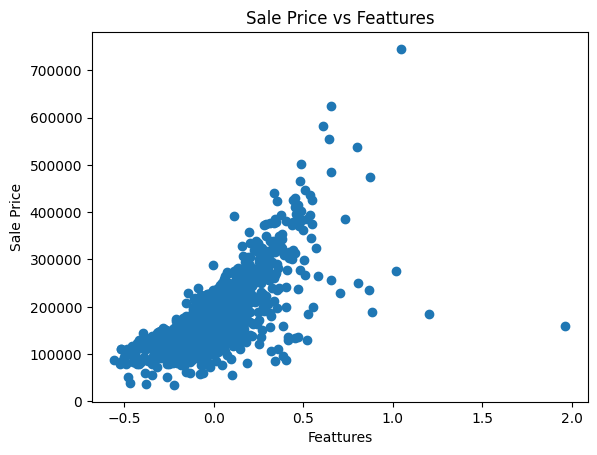

In [13]:
avg_features = pd.Series(features.loc[:, features.columns != 'Id'].mean(axis=1))
plt.scatter(avg_features, labels)
plt.xlabel('Feattures')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Feattures')
plt.show()

## Model

In [14]:
model = Sequential(
    [
        InputLayer(input_shape=(features.shape[1],)),
        Dense(64, activation='relu', name='hidden_layer_1', kernel_regularizer=l2(0.01)),
        Dense(64, activation='relu', name='hidden_layer_2', kernel_regularizer=l2(0.01)),
        Dense(1)
    ]
)
model.summary()

2024-02-18 19:59:08.826027: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 19:59:08.849760: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 19:59:08.849806: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 19:59:08.853126: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 19:59:08.853214: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 64)                4736      
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                4160      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8961 (35.00 KB)
Trainable params: 8961 (35.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=features.shape[0] / 58 * 1000,
    decay_rate=1,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(lr_schedule)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])


### Validation


In [16]:
valid_features = valid.drop('SalePrice', axis=1)
valid_labels = valid['SalePrice']
valid_features = clean_features(valid_features)

In [17]:
data = model.fit(
    features, labels, 
    epochs=1168, 
    steps_per_epoch=20, 
    validation_data=(valid_features, valid_labels))

Epoch 1/1168


2024-02-18 19:59:20.171472: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-18 19:59:21.328485: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7add175390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 19:59:21.328526: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2024-02-18 19:59:21.457976: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-18 19:59:22.102907: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708304362.571967   21660 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - 6s 15ms/step - loss: 38885228544.0000 - mean_squared_error: 38885228544.0000 - val_loss: 39652999168.0000 - val_mean_squared_error: 39652999168.0000
Epoch 2/1168
20/20 [==============================] - 0s 7ms/step - loss: 38883766272.0000 - mean_squared_error: 38883766272.0000 - val_loss: 39650979840.0000 - val_mean_squared_error: 39650979840.0000
Epoch 3/1168
20/20 [==============================] - 0s 8ms/step - loss: 38880833536.0000 - mean_squared_error: 38880833536.0000 - val_loss: 39646470144.0000 - val_mean_squared_error: 39646470144.0000
Epoch 4/1168
20/20 [==============================] - 0s 8ms/step - loss: 38874517504.0000 - mean_squared_error: 38874517504.0000 - val_loss: 39637307392.0000 - val_mean_squared_error: 39637307392.0000
Epoch 5/1168
20/20 [==============================] - 0s 8ms/step - loss: 38862458880.0000 - mean_squared_error: 38862458880.0000 - val_loss: 39620702208.0000 - val_mean_squared_error: 39620702208.0000
Ep

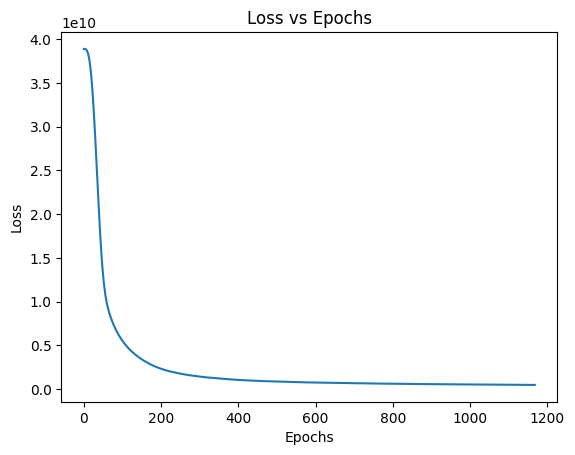

In [18]:
plt.plot(data.history['loss']) 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Submission

In [19]:
test = pd.read_csv(f'{data_dir}/test.csv')
test.drop(columns=['Id', 'Utilities', 'LotShape', 'MSSubClass', 'LandContour', 'LotConfig', 'LandSlope'], inplace=True)
clean_test = clean_features(test)
clean_test.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-2.038971,0.510333,0.363804,-0.064238,-0.269462,-1.449058,-0.989892,-0.088342,-0.396175,-0.735377,...,1.818336,-0.057207,-0.042776,0.919334,-0.187847,-0.092212,-0.038268,1.713318,-0.320112,-0.393068
1,-0.453225,0.555022,0.897553,-0.064238,-0.269462,-1.449058,-0.219624,-0.088342,-0.396175,-0.735377,...,-0.301440,-0.057207,-0.042776,-0.434156,2.525699,19.723675,-0.038268,1.713318,-0.320112,-0.393068
2,-0.453225,0.242199,0.809368,-0.064238,-0.269462,-1.308525,-0.219624,-0.088342,-0.396175,0.082394,...,-0.301440,-0.057207,-0.042776,0.919334,-0.187847,-0.092212,-1.140224,1.713318,-0.320112,-0.393068
3,-0.453225,0.420955,0.032053,-0.064238,-0.269462,-1.308525,-0.219624,-0.088342,-0.396175,0.082394,...,-0.301440,-0.057207,-0.042776,-0.434156,-0.187847,-0.092212,-0.038268,1.713318,-0.320112,-0.393068
4,-0.453225,-1.143162,-0.971475,-0.064238,-0.269462,-1.167993,-0.219624,-0.088342,0.728376,-0.735377,...,2.242291,-0.057207,-0.042776,-0.434156,-0.187847,-0.092212,-1.874861,1.713318,-0.320112,-0.393068


In [20]:
submission = pd.read_csv(f'{data_dir}/sample_submission.csv')
for i in range(test.shape[0]):
    submission.loc[i, 'SalePrice'] = model.predict(clean_test.iloc[i].values.reshape(1, -1))
submission.head()

1/1 [==============================] - 0s 17ms/step


,Id,SalePrice
0,1461,140900.968750
1,1462,122146.164062
2,1463,160929.203125
3,1464,168045.187500
4,1465,166881.781250


In [21]:
submission.to_csv(f'{data_dir}/submission.csv', index=False)

In [22]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f {data_dir}/submission.csv -m "Second submission using tensorflow."

100%|██████████████████████████████████████| 25.8k/25.8k [00:00<00:00, 43.7kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques